In [ ]:
# Flow ->
# Load data, convert date field in date format to avoid any conversion error, process it to add new columns(for date and hour)
# group data based on date and hour and extract info like #transactions, #users and sum of transactions
# use above metric to get the highest transaction hour each day

In [ ]:
# Load data and process
import pandas as pd
transaction_data = pd.read_csv('/content/sample_transaction_data.csv')
transaction_data['date'] = pd.to_datetime(transaction_data['date'])
transaction_data['transaction_date'] = transaction_data['date'].dt.date
transaction_data['transaction_hour'] = transaction_data['date'].dt.hour


In [ ]:
## Task 1 --- Metrics for every date-hour combination
# group data on basis of date and hour and extract info
grouped_data = transaction_data.groupby(['transaction_date', 'transaction_hour']).agg(
    total_transactions=('transaction_id', 'count'),
    unique_users=('user_id', 'nunique'),
    total_transaction_amount=('transaction_amount', 'sum')
).reset_index()

print("Metrics Per Date-Hour")
print(grouped_data.head())


Metrics Per Date-Hour
  transaction_date  transaction_hour  total_transactions  unique_users  \
0       2022-04-05                15                   1             1   
1       2022-04-06                15                   1             1   
2       2022-04-07                 9                   2             2   
3       2022-04-07                11                   2             2   
4       2022-04-07                13                   2             2   

   total_transaction_amount  
0                    598.74  
1                    598.74  
2                    746.24  
3                    647.72  
4                    634.92  


In [ ]:
##Task 2 --- Highest transaction hour per date
# Above metrics can also be used
# grouping data to get the highest tansaction amount per day
grouped = transaction_data.groupby(['transaction_date', 'transaction_hour']).agg(
    total_transaction_amount=('transaction_amount', 'sum')
).reset_index()

# get the highest transaction hour each day
highest_hour_per_date = grouped.loc[
    grouped.groupby('transaction_date')['total_transaction_amount'].idxmax()
].sort_values(by='transaction_date')

print("Highest transaction hour per date:")
print(highest_hour_per_date)

Highest transaction hour per date:
   transaction_date  transaction_hour  total_transaction_amount
0        2022-04-05                15                    598.74
1        2022-04-06                15                    598.74
6        2022-04-07                17                    982.43
10       2022-04-23                15                    798.74
12       2022-07-05                15                   2834.76
16       2022-07-06                15                   2834.76
18       2022-07-09                15                   3433.50
23       2022-11-04                17                    749.90
24       2023-03-04                 9                    946.46
31       2023-05-24                13                    616.99
38       2023-06-08                17                    912.62
39       2023-12-08                 9                    818.74
48       2023-12-20                17                    960.13


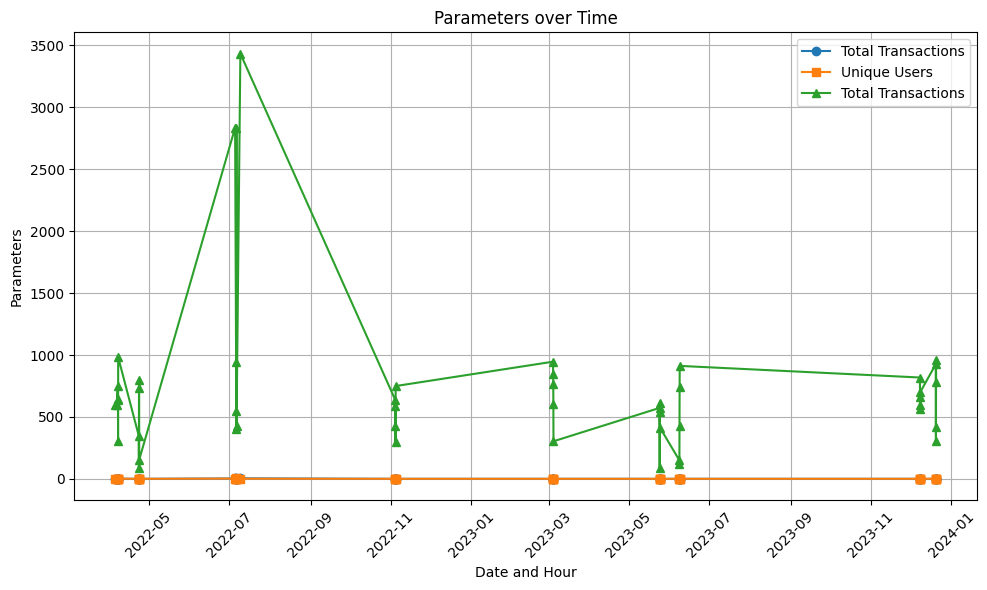

In [ ]:
#Additional step to view data for better readablity
import matplotlib.pyplot as plt
grouped_data['datetime_hour'] = pd.to_datetime(grouped_data['transaction_date'].astype(str) + ' ' + grouped_data['transaction_hour'].astype(str))
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['datetime_hour'], grouped_data['total_transactions'], label='Total Transactions', marker='o')
plt.plot(grouped_data['datetime_hour'], grouped_data['unique_users'], label='Unique Users', marker='s')
plt.plot(grouped_data['datetime_hour'], grouped_data['total_transaction_amount'], label='Total Transactions', marker='^')
plt.title('Parameters over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Parameters')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()